In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>


In [2]:
data_path = 'CCGENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 2. <a name="2">Data investigation and preprocessing</a>
in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
then
### Define below all the issues that you had found in the previous part
1-null values in CREDIT_LIMIT , MINIMUM_PAYMENTS columns
2-outliers 
3-all have numerical values except for CUST_ID (string) - unnecessary information in training , data skewness

In [24]:
#filling misssing values with mean or delete them
filling_values = {"CREDIT_LIMIT": df['CREDIT_LIMIT'].mean(),"MINIMUM_PAYMENTS": df['MINIMUM_PAYMENTS'].mean()}
df1 = df.fillna(value=filling_values)


In [25]:
df1.dtypes


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
df2 = df1.drop("CUST_ID", 1) 

In [22]:
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
#remove skewness
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
#https://www.codegrepper.com/code-examples/python/finding+outliers+for+all+columns+in+dataframe
cols = ['BALANCE', 'BALANCE_FREQUENCY','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS',
       'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'] 

percentile25 = df2[cols].quantile(0.25)
percentile75 = df2[cols].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#print(df2[df2[cols] > upper_limit])
#print(df2[df2[cols] < lower_limit])
df3 = df2[~((df1[cols] < (percentile25 - 1.5 * iqr)) |(df1[cols] > (percentile75 + 1.5 * iqr))).any(axis=1)]

In [21]:
df3.info()#remove outliers caused data loss

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 8760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2951 non-null   float64
 1   BALANCE_FREQUENCY                 2951 non-null   float64
 2   PURCHASES                         2951 non-null   float64
 3   ONEOFF_PURCHASES                  2951 non-null   float64
 4   INSTALLMENTS_PURCHASES            2951 non-null   float64
 5   CASH_ADVANCE                      2951 non-null   float64
 6   PURCHASES_FREQUENCY               2951 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2951 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2951 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2951 non-null   float64
 10  CASH_ADVANCE_TRX                  2951 non-null   int64  
 11  PURCHASES_TRX                     2951 non-null   int64  
 12  CREDIT

In [26]:
print (df2[df2.duplicated()])

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


In [27]:
#https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Fskewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37
df2.skew(axis = 0) #skewness[-1,1]

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

In [29]:
cols1 = ['BALANCE', 'BALANCE_FREQUENCY','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY',
'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS',
       'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'] 
df4=np.log(df2[cols1]) 
df4.skew(axis=0) #log is not valid

BALANCE                            NaN
BALANCE_FREQUENCY                  NaN
BALANCE_FREQUENCY                  NaN
PURCHASES                          NaN
ONEOFF_PURCHASES                   NaN
INSTALLMENTS_PURCHASES             NaN
CASH_ADVANCE                       NaN
ONEOFF_PURCHASES_FREQUENCY         NaN
CASH_ADVANCE_FREQUENCY             NaN
CASH_ADVANCE_TRX                   NaN
PURCHASES_TRX                      NaN
CREDIT_LIMIT                 -0.107381
PAYMENTS                     -0.149248
MINIMUM_PAYMENTS              0.008734
PRC_FULL_PAYMENT                   NaN
TENURE                       -3.275669
dtype: float64

## 3. <a name="2">Modeling</a>


## Clustering with Kmeans

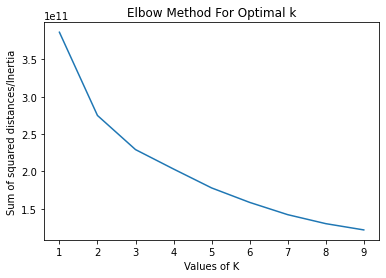

In [32]:
#https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
#elbow curve
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(df2)
     Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
     # initialise kmeans
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(df)
     cluster_labels = kmeans.labels_
 
     # silhouette score
     silhouette_avg.append(silhouette_score(df, cluster_labels))plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

SyntaxError: invalid syntax (587250435.py, line 12)

In [37]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df2, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

For n_clusters = 2 The average silhouette_score is : 0.511307699456009
For n_clusters = 3 The average silhouette_score is : 0.4645690623243453
For n_clusters = 4 The average silhouette_score is : 0.3896747465983954
For n_clusters = 5 The average silhouette_score is : 0.3924095800836532
For n_clusters = 6 The average silhouette_score is : 0.3700010011471749


In [38]:
#thus k=2 is the best 
kmeans = KMeans(n_clusters=2, random_state=0).fit(df2)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 1 ... 1 1 1]
[[3.90479615e+03 9.45320269e-01 2.42324901e+03 1.58714753e+03
  8.36502106e+02 2.63848702e+03 5.63396973e-01 3.49249946e-01
  4.11887757e-01 2.30618646e-01 6.71118350e+00 2.86427796e+01
  9.88930757e+03 4.39770599e+03 1.80258348e+03 1.51684407e-01
  1.17453855e+01]
 [9.76677019e+02 8.81401720e-01 6.46456029e+02 3.38593328e+02
  3.08149525e+02 5.48367196e+02 4.77727227e-01 1.67045847e-01
  3.57143841e-01 1.12385982e-01 2.39284663e+00 1.13433912e+01
  3.06692281e+03 1.07597563e+03 6.09917384e+02 1.61369359e-01
  1.14771858e+01]]


In [47]:
#1st cluster
df_1=df2[kmeans.labels_==0]
df_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,3904.521491,0.945309,2427.202110,1589.736678,837.866710,2634.835773,0.564316,0.349820,0.412560,0.230328,6.706362,28.689505,9895.380394,4403.234365,1802.956599,0.151932,11.747689
std,3098.256284,0.147418,4076.306733,3234.538379,1657.929417,3736.631039,0.412816,0.367480,0.413937,0.262746,11.035886,42.112560,3471.784853,5135.390580,4151.202184,0.301613,0.945445
min,0.488050,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,31.845894,5.045387,0.000000,6.000000
25%,1130.014995,1.000000,102.915000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,7500.000000,1404.265482,361.692247,0.000000,12.000000
50%,3508.560867,1.000000,1023.290000,451.180000,192.950000,1209.369868,0.666667,0.181818,0.333333,0.166667,2.000000,12.000000,9200.000000,2543.550697,1040.283795,0.000000,12.000000
75%,5826.650811,1.000000,3256.155000,1936.255000,1056.245000,4096.108984,1.000000,0.666667,0.833333,0.416667,10.000000,39.000000,11500.000000,5694.238346,1867.921325,0.090909,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.250000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [48]:
#2nd cluster
df_2=df2[kmeans.labels_==1]
df_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000
mean,978.043718,0.881433,646.170702,338.443883,308.013516,550.277597,0.477516,0.166972,0.356986,0.112517,2.396057,11.338385,3068.290950,1075.945986,610.342843,0.161298,11.476681
std,1076.852891,0.219237,893.134122,664.488912,515.567946,1008.364576,0.396103,0.265992,0.392892,0.173527,4.880289,16.182476,1956.234944,1125.998686,1479.458370,0.294800,1.387934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,95.853493,0.857143,35.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,347.227774,158.916575,0.000000,12.000000
50%,654.574445,1.000000,317.100000,0.000000,81.120000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,7.000000,2500.000000,676.487532,248.140964,0.000000,12.000000
75%,1466.852542,1.000000,875.520000,400.000000,416.730000,730.506420,0.916667,0.250000,0.750000,0.166667,3.000000,14.000000,4000.000000,1379.683829,576.331228,0.166667,12.000000
max,5965.535557,1.000000,8591.310000,8053.950000,4313.220000,6718.127621,1.000000,1.000000,1.000000,1.500000,123.000000,232.000000,10000.000000,10893.778440,28483.254830,1.000000,12.000000


## Clustering with Hierarchical Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df2)
clustering.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)